In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Merge 12 months data into a single file

In [2]:
df1 = pd.read_csv('sales_data/Sales_April_2019.csv')

In [3]:
files = [file for file in os.listdir('sales_data/')]

all_data = []
for file in files:
    print(file)
    all_data.append("sales_data/"+file)
    
df = pd.concat(map(pd.read_csv,all_data),ignore_index=True)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
df.shape

(186850, 6)

In [5]:
df1.shape

(18383, 6)

In [6]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
df.to_csv('all_data.csv',index=False)

### Read in updated dataframe

In [8]:
data = pd.read_csv('all_data.csv')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [9]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [10]:
data = data.dropna()

In [11]:
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### Find 'or' and delete

In [12]:
data = data[data['Order Date'].str[0:2]!='Or']

In [13]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

### Data Agumentation 

In [14]:
data['Month'] = data['Order Date'].str[0:2]
data['Month'] = data['Month'].astype('int64')

In [15]:
data ['Price Each']= data['Price Each'].astype('float64')
data ['Quantity Ordered']= data['Quantity Ordered'].astype('float64')

In [16]:
data['Cost'] = data['Price Each'] * data['Quantity Ordered']

In [17]:
print(data['Price Each'].unique())


[  11.95   99.99  600.     11.99 1700.     14.95  389.99    3.84  150.
    2.99  700.    300.    149.99  109.99  999.99  400.    379.99]


## Question 1. Best month for sales

In [18]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Cost
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [19]:
month_cost = data.groupby('Month')['Cost'].sum()

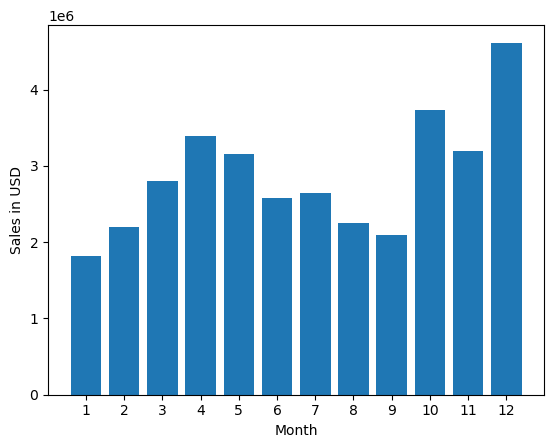

In [20]:
plt.bar(month_cost.index, month_cost.values)
plt.xticks(range(1, 13))
plt.ylabel("Sales in USD")
plt.xlabel("Month")
plt.show()

##### Recommendation 1
Based on the bar chart showing monthly sales data, here are some recommendations you could give to the client:

Maximize December Sales: The peak in sales during December suggests a significant opportunity for revenue. Consider strategies like holiday promotions or special events to further boost sales.

Inventory Management: Prepare for the end-of-year surge by ensuring adequate stock levels to meet the increased demand.

Marketing Focus: Allocate more marketing resources to months with lower sales to help increase revenue during those periods.


## Question 2: Which city sold most products?

In [21]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Cost
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task : Add a sales column

In [22]:
def get_city(x):
    return x.split(',')[1]
def get_state(y):
    return y.split(',')[2].split(' ')[1]

data['City'] = data['Purchase Address'].apply(lambda x:get_city(x)+' '+get_state(x))

In [23]:
data['City']

0                 Dallas TX
2                 Boston MA
3            Los Angeles CA
4            Los Angeles CA
5            Los Angeles CA
                ...        
186845       Los Angeles CA
186846     San Francisco CA
186847     San Francisco CA
186848     San Francisco CA
186849     San Francisco CA
Name: City, Length: 185950, dtype: object

In [24]:
result = data.groupby('City').sum()

In [25]:
result

,Quantity Ordered,Price Each,Month,Cost
City,,,,
Atlanta GA,16602.0,2779908.20,104794,2795498.58
Austin TX,11153.0,1809873.61,69829,1819581.75
Boston MA,22528.0,3637409.77,141112,3661642.01
Dallas TX,16730.0,2752627.82,104620,2767975.40
Los Angeles CA,33289.0,5421435.23,208325,5452570.80
New York City NY,27932.0,4635370.83,175741,4664317.43
Portland ME,2750.0,447189.25,17144,449758.27
Portland OR,11303.0,1860558.22,70621,1870732.34
San Francisco CA,50239.0,8211461.74,315520,8262203.91


In [26]:
result.index

Index([' Atlanta GA', ' Austin TX', ' Boston MA', ' Dallas TX',
       ' Los Angeles CA', ' New York City NY', ' Portland ME', ' Portland OR',
       ' San Francisco CA', ' Seattle WA'],
      dtype='object', name='City')

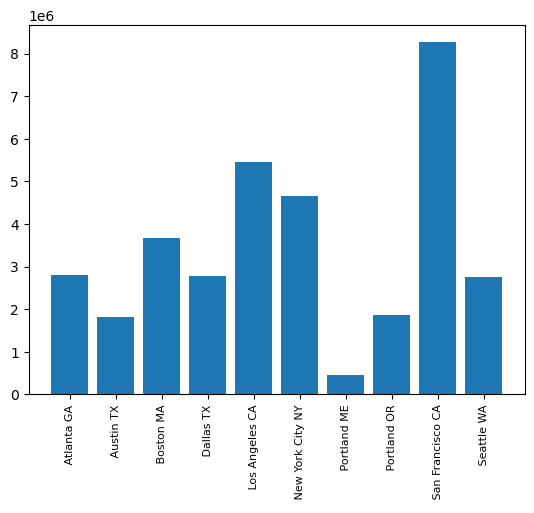

In [27]:
plt.bar(result.index,result['Cost'])
plt.xticks(rotation = 'vertical', size=8)
plt.show()

##### Recommendation 2
Focus on High-Performing Cities: San Francisco CA shows the highest value, indicating strong performance or demand. Strategies could be developed to further enhance this success.

Expand in Emerging Markets: Cities with lower values may represent untapped potential. Consider exploring opportunities for growth in these areas.

Tailored Marketing: Customize marketing strategies to cater to the unique demographics and consumer behaviors in each city.

Competitive Analysis: Investigate why certain cities are performing better than others and apply those learnings to improve performance across all locations.

## Question 3: Best time for displaying advertisements to maximize likelihood of customer's buying product?

In [28]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Cost,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [29]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [30]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Cost,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [31]:
data['Hour'] = data['Order Date'].dt.hour

In [32]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Cost,City,Hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [33]:
hour_df = data.groupby(data['Hour']).sum()

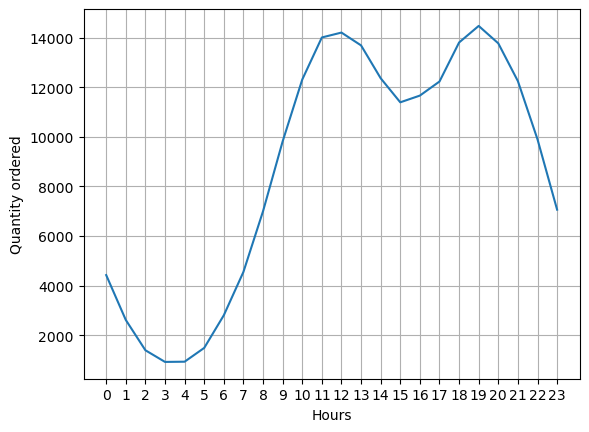

In [34]:
plt.plot(hour_df.index, hour_df['Quantity Ordered'])
plt.xticks(range(0,24))
plt.xlabel('Hours')
plt.grid()
plt.ylabel('Quantity ordered')
plt.show()

##### Recommendation - 3
Target ADs before 11 am and 7 pm. Also try increasing the sales in hours like 8 pm by giving out special offers (time focused) to continue the trend. 

Peak Hours Staffing: Increase staffing during peak hours around 11 AM and 8 PM to handle the high volume of orders efficiently.

Operational Efficiency: During low-demand hours, especially around 5 AM and just before 3 PM, consider reducing operational costs or scheduling maintenance.

Promotional Offers: Implement targeted promotions during off-peak hours to boost sales and even out the demand throughout the day.

Customer Behavior Analysis: Investigate the reasons behind the ordering patterns to better understand customer preferences and adjust business strategies accordingly.

## Question 4: What products are most often sold together?

In [35]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Cost,City,Hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [57]:
from itertools import combinations
from collections import Counter

# Group orders by Order ID and aggregate the products into a list
orders = data.groupby('Order ID')['Product'].apply(list)

# Initialize an empty Counter object to count pairs of products
pair_counts = Counter()

# Iterate through each order and count pairs of products
for order in orders:
    # Generate all possible combinations of 2 products in the order
    pairs = combinations(order, 2)
    # Update the counter with the pairs
    pair_counts.update(pairs)

# Extract the most common pairs
top_pairs = pair_counts.most_common(10)  # Change 5 to however many top pairs you want

# Print the top pairs
for pair, count in top_pairs:
    print(pair, ':', count)


('iPhone', 'Lightning Charging Cable') : 1005
('Google Phone', 'USB-C Charging Cable') : 987
('iPhone', 'Wired Headphones') : 447
('Google Phone', 'Wired Headphones') : 414
('Vareebadd Phone', 'USB-C Charging Cable') : 361
('iPhone', 'Apple Airpods Headphones') : 360
('Google Phone', 'Bose SoundSport Headphones') : 220
('USB-C Charging Cable', 'Wired Headphones') : 160
('Vareebadd Phone', 'Wired Headphones') : 143
('Lightning Charging Cable', 'Wired Headphones') : 92


##### Recommendation 4
Bundling Products: The most frequently bought together products are ‘iPhone’ and ‘Lightning Charging Cable’, followed by ‘Google Phone’ and ‘USB-C Charging Cable’. Consider creating product bundles for these items to encourage more purchases.

Cross-Selling Opportunities: ‘Wired Headphones’ are commonly bought with different types of phones. Use this information to cross-sell headphones to customers who are buying phones.

Inventory Management: Ensure that you have sufficient stock of the items that are frequently bought together. This is especially important for ‘iPhone’ and ‘Lightning Charging Cable’, and ‘Google Phone’ and ‘USB-C Charging Cable’.

Marketing Campaigns: Tailor your marketing campaigns to promote the purchase of these items together. For example, you could offer a discount when customers buy an ‘iPhone’ with a ‘Lightning Charging Cable’.

## Questions 5: What products sold the most and why?

In [39]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Cost,City,Hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [51]:
quants = data.groupby('Product').sum('Quantity Ordered')

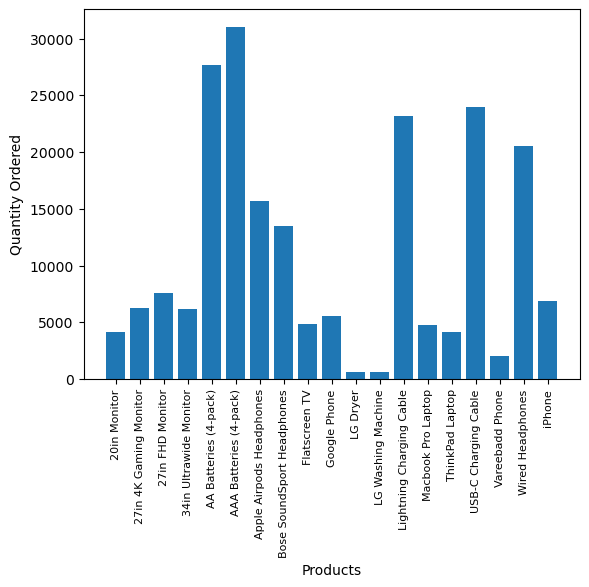

In [52]:
plt.bar(quants.index,quants['Quantity Ordered'])
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.xticks(quants.index, rotation = 'vertical',size =8)
plt.show()

In [53]:
prices = data.groupby('Product').mean()['Price Each']

In [54]:
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

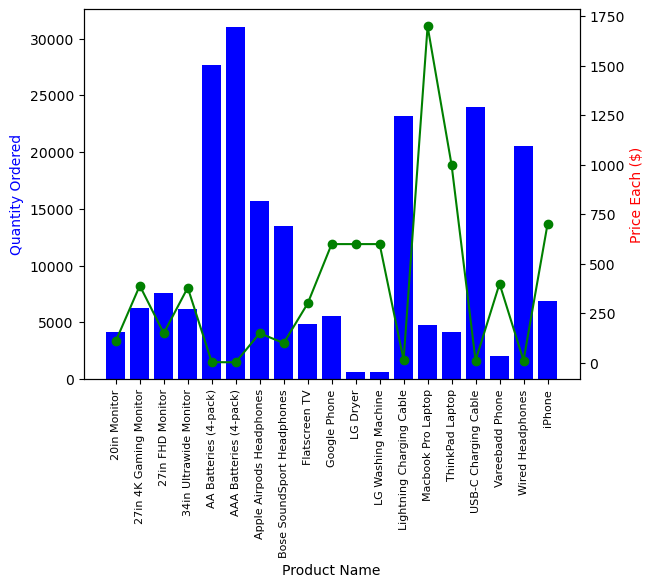

In [55]:
# Create figure and axis objects
fig, ax1 = plt.subplots()

# Plot quantity ordered on primary y-axis
ax1.bar(quants.index, quants['Quantity Ordered'], color='b')
ax1.set_ylabel('Quantity Ordered', color='b')

# Create a secondary y-axis and plot prices on it
ax2 = ax1.twinx()
ax2.plot(prices.index, prices.values, color='g', marker='o')
ax2.set_ylabel('Price Each ($)', color='r')

# Rotate x-axis labels
ax1.set_xlabel('Product Name')
ax1.set_xticks(range(len(quants.index)))
ax1.set_xticklabels(quants.index, rotation='vertical', size=8)

plt.show()

##### Recommendation 5
Stock Prioritization: Prioritize stocking items with high quantity orders, such as ‘AA Batteries’ and ‘AAA Batteries’, as they show consistent demand.

Pricing Strategy: Review the pricing of high-value items like ‘Macbook Pro Laptop’ and ‘ThinkPad Laptop’ to ensure competitiveness while maintaining profitability.

Promotional Activities: Consider promotions for mid-range priced items with substantial quantity orders like ‘Apple Airpods Headphones’ to boost sales.

Product Placement: Place lower-priced, high-volume items like batteries near the checkout area to encourage impulse purchases.